<a href="https://colab.research.google.com/github/Yospy/Car-Price-Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install category_encoders
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
from sklearn.utils import shuffle 
from category_encoders import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
sn.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('/content/data 2.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


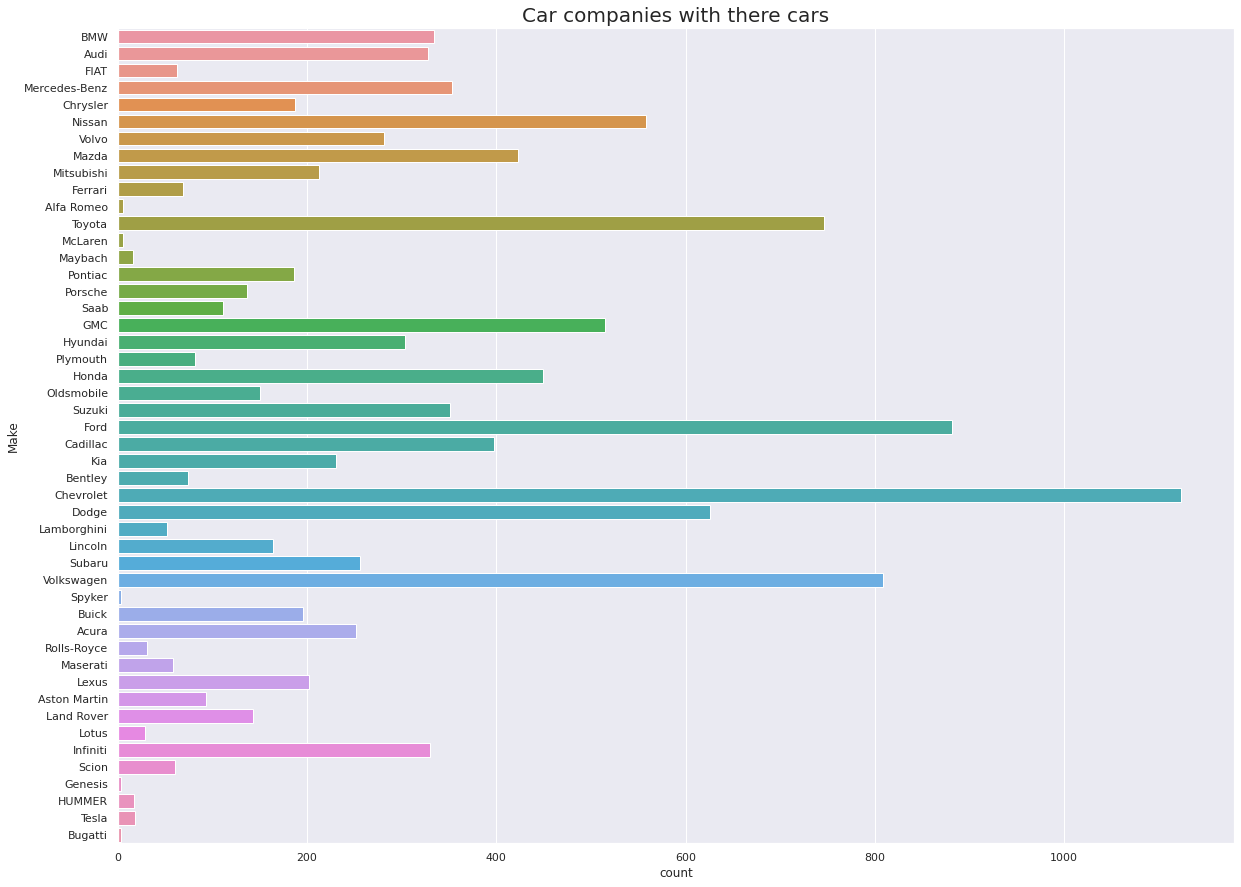

In [3]:
plt.figure(figsize=(20,15))
sn.countplot(y=data.Make)
plt.title("Car companies with there cars",fontsize=20)
plt.show()

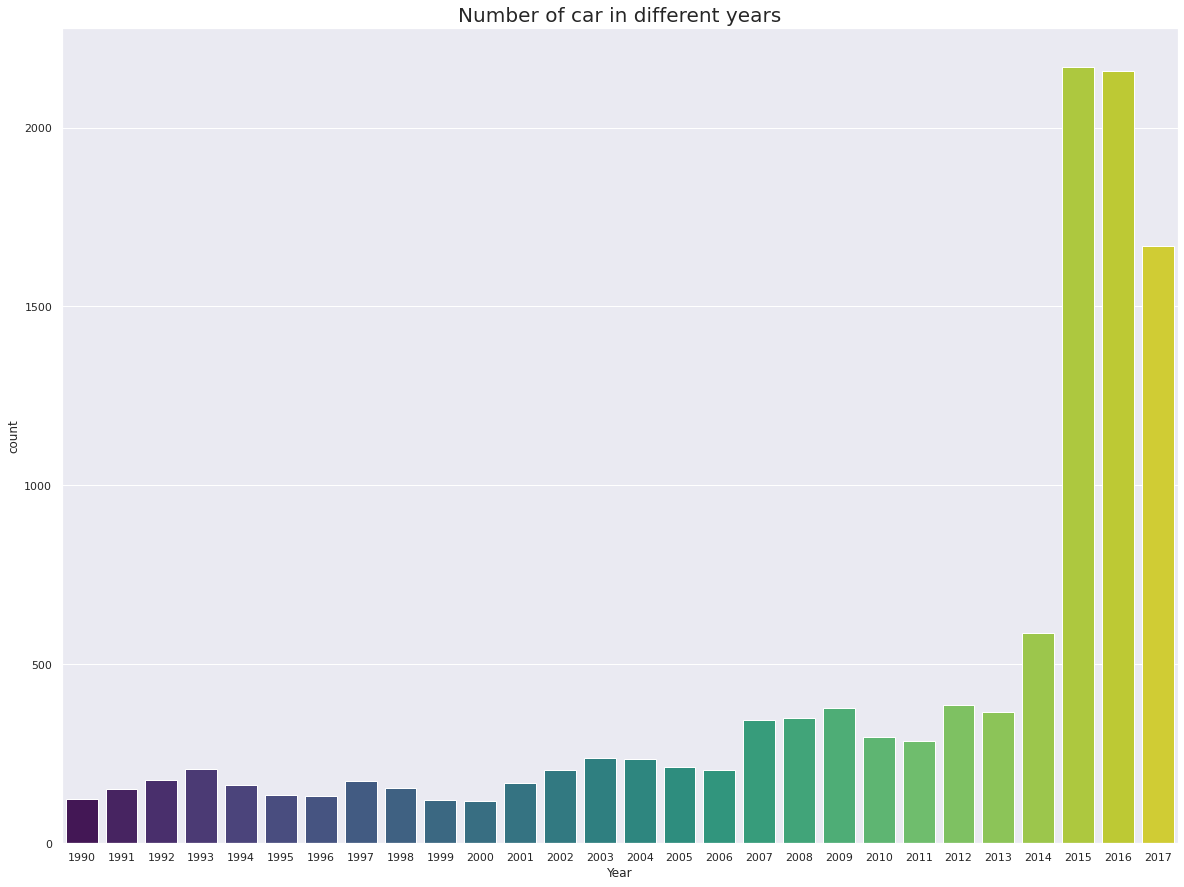

In [4]:
plt.figure(figsize=(20,15))
sn.countplot(data.Year, palette='viridis')
plt.title("Number of car in different years",fontsize=20)
plt.show()

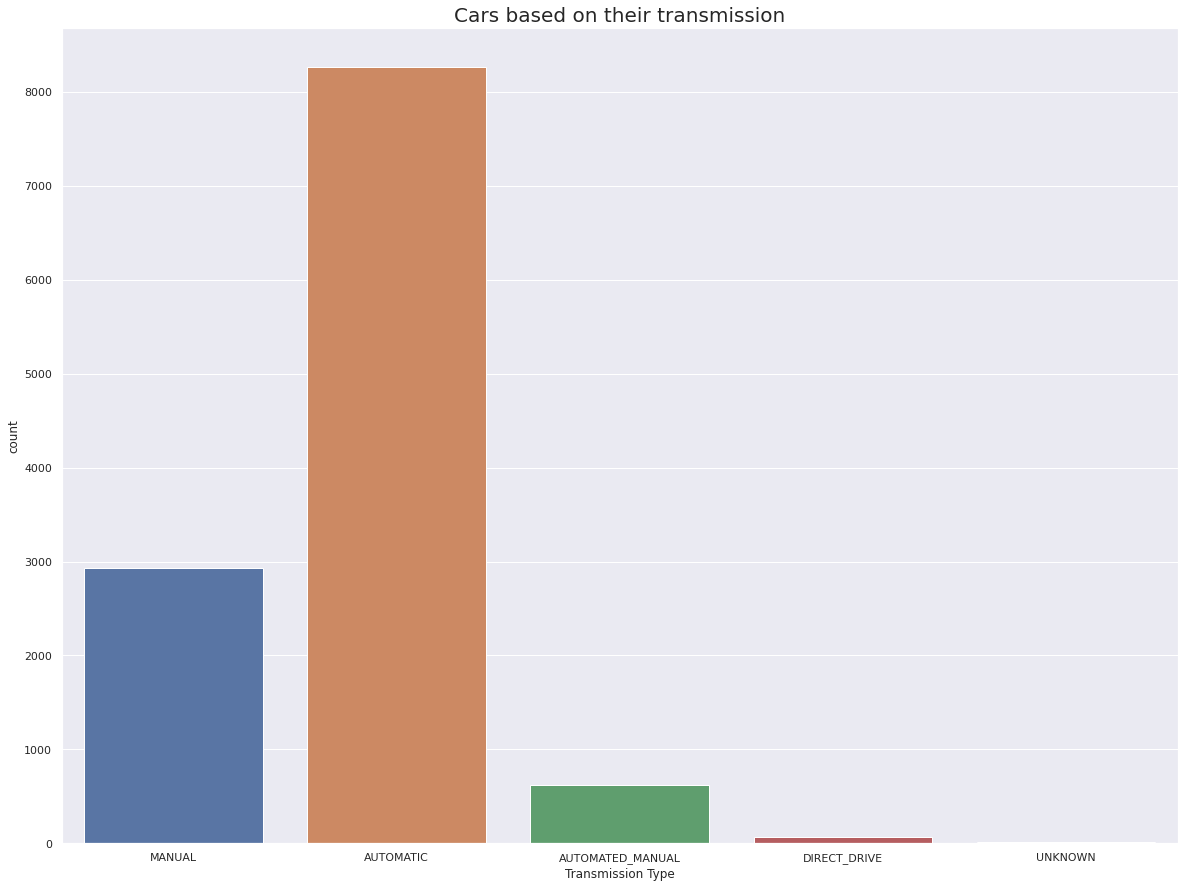

In [5]:
plt.figure(figsize=(20,15))
sn.countplot(data['Transmission Type'])
plt.title("Cars based on their transmission",fontsize=20)
plt.show()

Getting Unique Elements

In [6]:
data.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

Text(0.5, 1.0, 'Cars on engine fuel type')

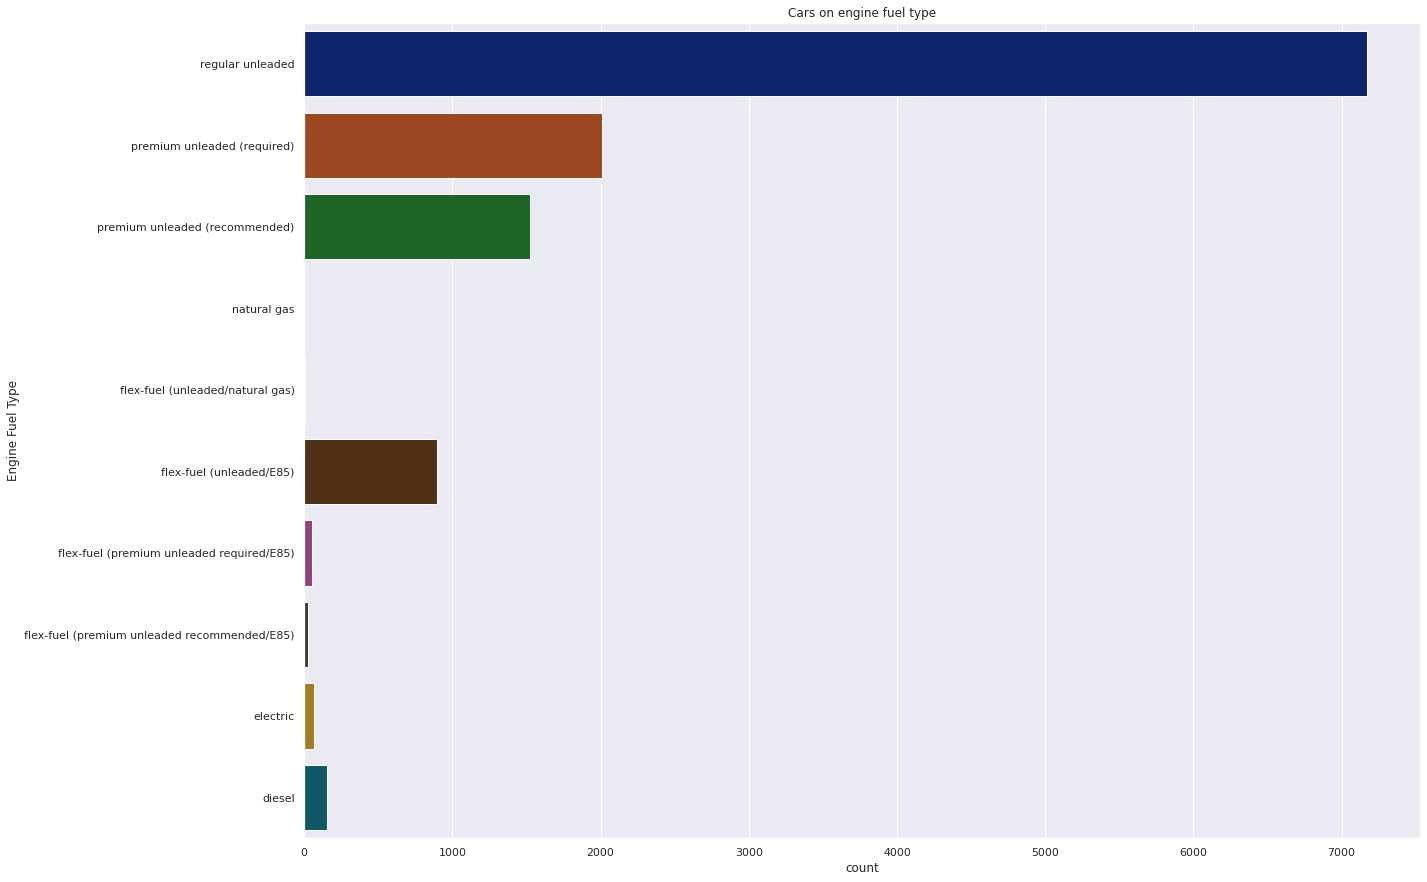

In [7]:
plt.figure(figsize=(20,15))
sn.countplot(y=data['Engine Fuel Type'].sort_values(ascending=False),palette='dark')
plt.title("Cars on engine fuel type")

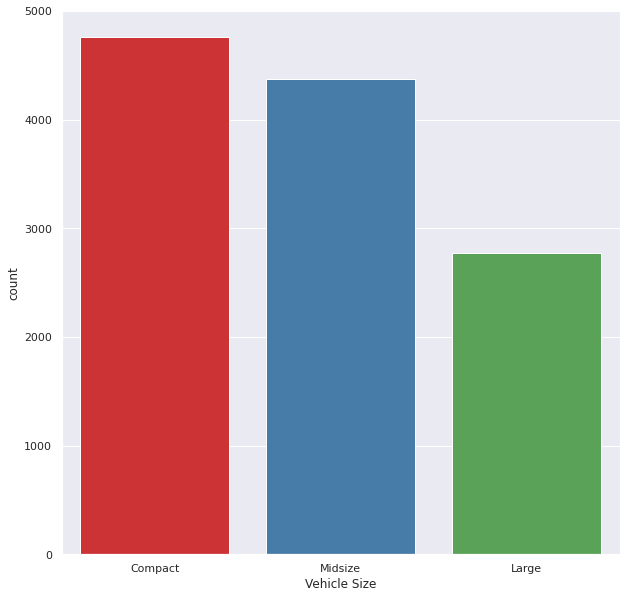

In [8]:
plt.figure(figsize=(10,10))
sn.countplot(x=data['Vehicle Size'],palette='Set1')

# Missing Values

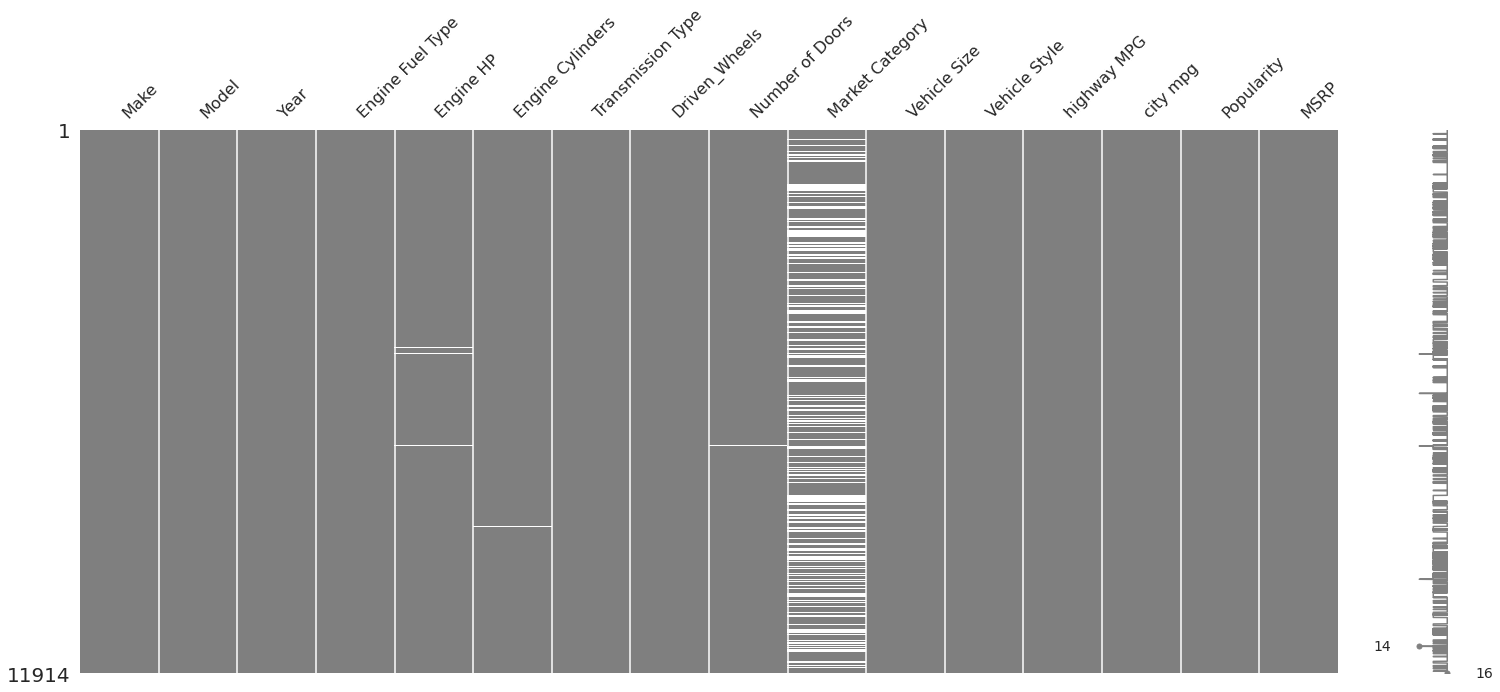

In [9]:
msno.matrix(data,color=(0.5,0.5,0.5))

In [10]:
data.groupby('Make')[['Engine HP', 'Engine Cylinders', 'Popularity']].agg(['min', 'max', 'mean'])

Engine HP                      Engine Cylinders        \
                    min     max         mean              min   max   
Make                                                                  
Acura             111.0   573.0   244.797619              4.0   6.0   
Alfa Romeo        237.0   237.0   237.000000              4.0   4.0   
Aston Martin      420.0   568.0   484.322581              8.0  12.0   
Audi              108.0   610.0   277.695122              4.0  12.0   
BMW               170.0   600.0   326.907186              0.0  12.0   
Bentley           400.0   631.0   533.851351              8.0  12.0   
Bugatti          1001.0  1001.0  1001.000000             16.0  16.0   
Buick             138.0   310.0   219.244898              4.0   8.0   
Cadillac          140.0   640.0   332.309824              4.0   8.0   
Chevrolet          55.0   650.0   246.972247              0.0   8.0   
Chrysler          100.0   385.0   229.139037              4.0   8.0   
Dodge              92.0   707.0   244.415335              4.0  10.0   
FIAT              101.0   180.0   143.559322              0.0   4.0   
Ferrari           400.0   731.0   511.956522              8.0  12.0   
Ford               63.0   662.0   243.097926              0.0   8.0   
GMC               105.0   420.0   259.844660              4.0   8.0   
Genesis           311.0   420.0   347.333333              6.0   8.0   
HUMMER            239.0   300.0   261.235294              5.0   8.0   
Honda              62.0   280.0   195.749441              0.0   6.0   
Hyundai            81.0   429.0   201.917492              4.0   8.0   
Infiniti          145.0   420.0   310.066667              4.0   8.0   
Kia               125.0   420.0   206.827434              0.0   8.0   
Lamborghini       550.0   750.0   614.076923             10.0  12.0   
Land Rover        174.0   550.0   322.097902              4.0   8.0   
Lexus             134.0   552.0   277.415842              4.0  10.0   
Lincoln           188.0   380.0   284.910256              4.0   8.0   
Lotus             189.0   400.0   275.965517              4.0   8.0   
Maserati          345.0   523.0   420.793103              6.0   8.0   
Maybach           543.0   631.0   590.500000             12.0  12.0   
Mazda              82.0   274.0   171.992908              4.0   6.0   
McLaren           562.0   641.0   610.400000              8.0   8.0   
Mercedes-Benz     121.0   641.0   350.181818              0.0  12.0   
Mitsubishi         66.0   320.0   173.429245              3.0   8.0   
Nissan             90.0   600.0   239.921533              0.0   8.0   
Oldsmobile        110.0   275.0   177.466667              4.0   8.0   
Plymouth           92.0   253.0   131.560976              4.0   6.0   
Pontiac            74.0   415.0   190.295699              4.0   8.0   
Porsche           208.0   605.0   392.794118              4.0  10.0   
Rolls-Royce       322.0   624.0   487.548387              8.0  12.0   
Saab              150.0   390.0   220.522523              4.0   8.0   
Scion              94.0   200.0   154.433333              4.0   4.0   
Spyker            400.0   400.0   400.000000              8.0   8.0   
Subaru             66.0   305.0   197.308594              3.0   6.0   
Suzuki             66.0   261.0   160.287749              4.0   6.0   
Tesla               NaN     NaN          NaN              0.0   0.0   
Toyota             93.0   381.0   236.147849              0.0   8.0   
Volkswagen         81.0   444.0   189.757726              4.0  12.0   
Volvo             114.0   345.0   230.971530              4.0   6.0   

                         Popularity                
                    mean        min   max    mean  
Make                                               
Acura           5.333333        204   204   204.0  
Alfa Romeo      4.000000        113   113   113.0  
Aston Martin   10.623656        259   259   259.0  
Audi            5.557927       3105  3105  3105.0  
BMW             5.958084    

Text(0.5, 1.0, 'Average price of cars in different years')

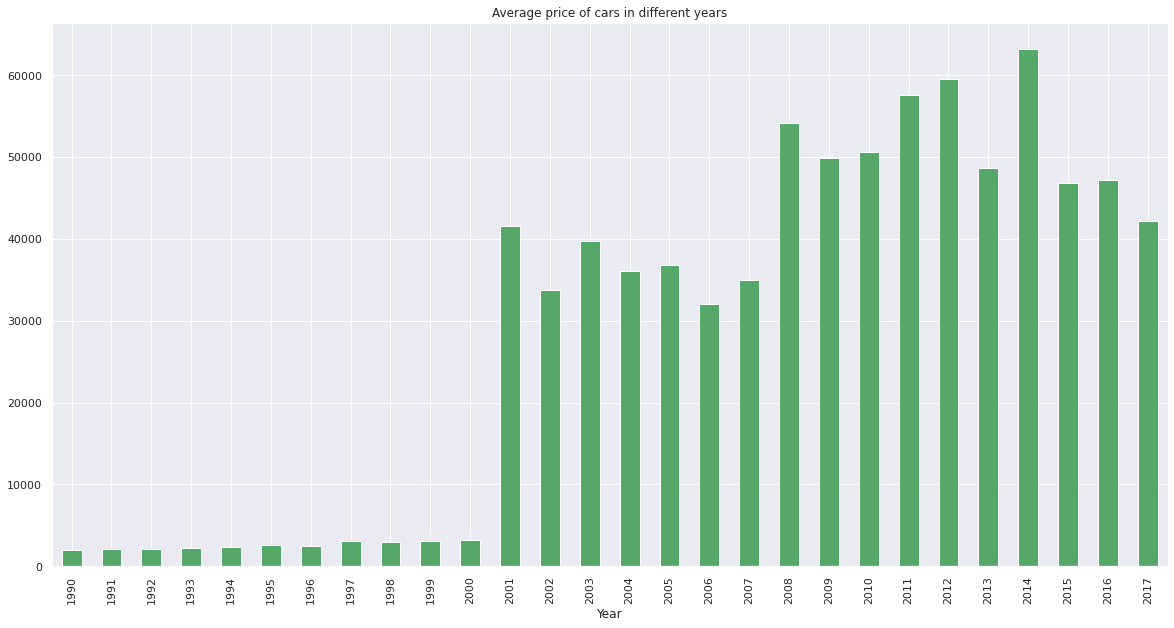

In [11]:
plt.figure(figsize=(20,10))
data.groupby('Year')['MSRP'].mean().plot(kind='bar',color='g')
plt.title("Average price of cars in different years")

Text(0.5, 1.0, 'Average price of cars of different car companies')

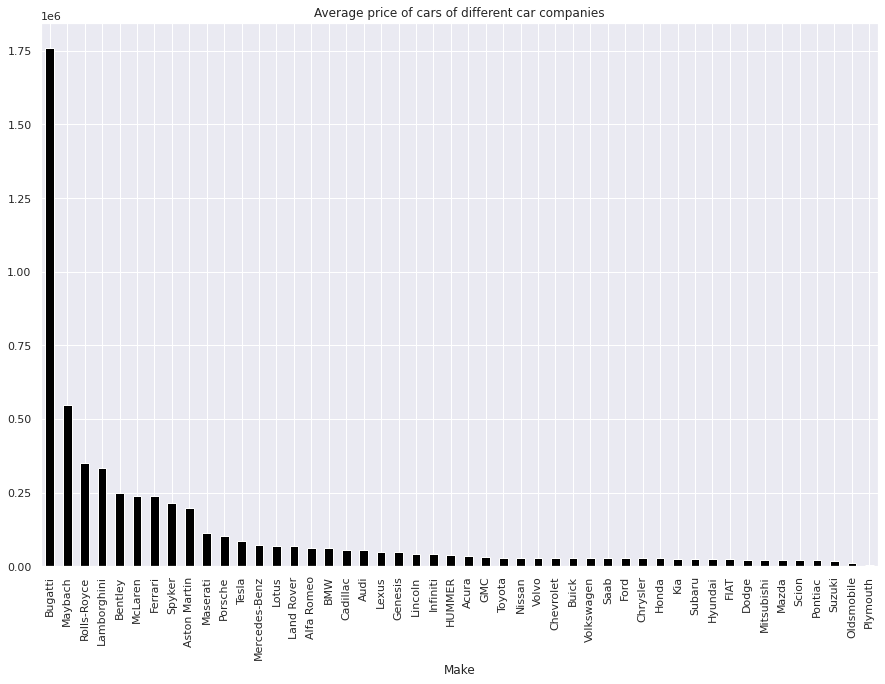

In [12]:
plt.figure(figsize=(15,10))
data.groupby(['Make']).mean()['MSRP'].sort_values(ascending=False).plot(kind='bar',color='black')
plt.title("Average price of cars of different car companies")

Text(0.5, 1.0, 'Cars based on their Horse Power')

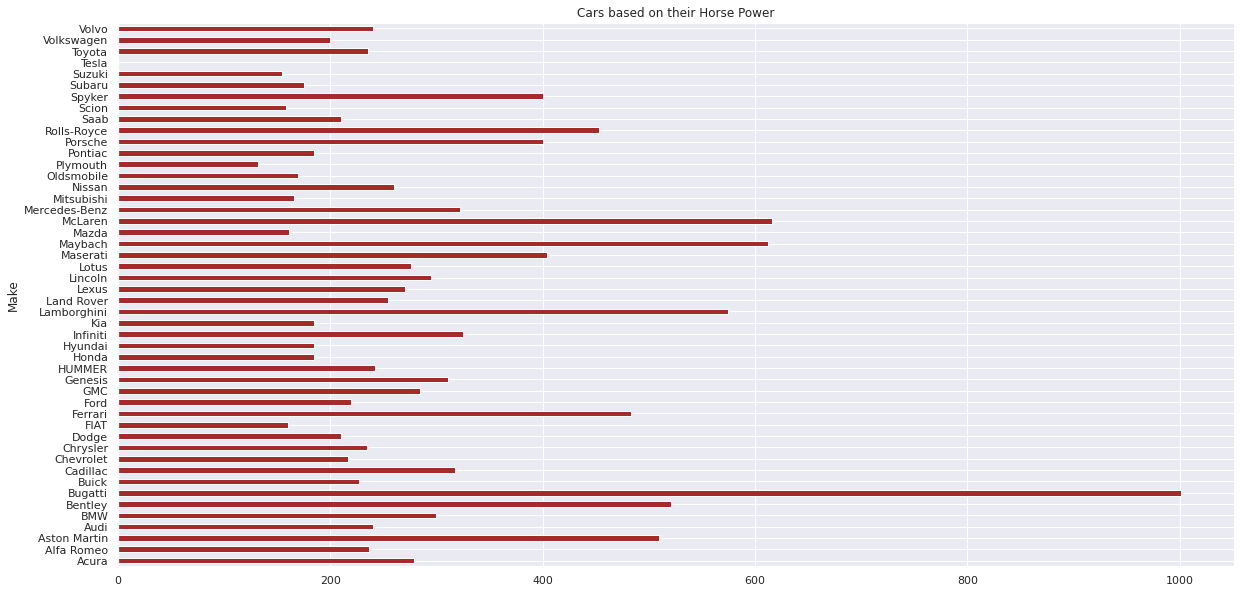

In [13]:
plt.figure(figsize=(20,10))
data.groupby('Make').median()['Engine HP'].plot(kind='barh',color='brown')
plt.title("Cars based on their Horse Power")

Text(0.5, 1.0, 'Based on Drive Terrain')

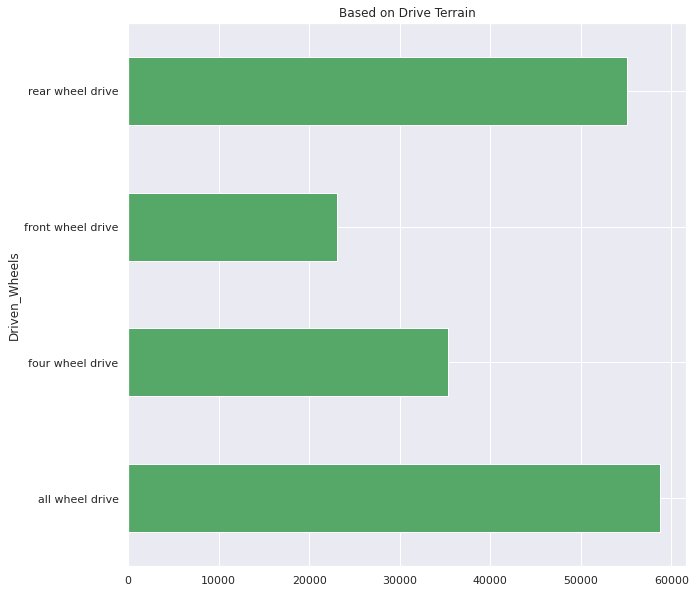

In [14]:
plt.figure(figsize=(10,10))
data.groupby('Driven_Wheels').mean()['MSRP'].plot(kind='barh',color='g')
plt.title("Based on Drive Terrain")

Text(0.5, 1.0, 'Popularity of various car brands')

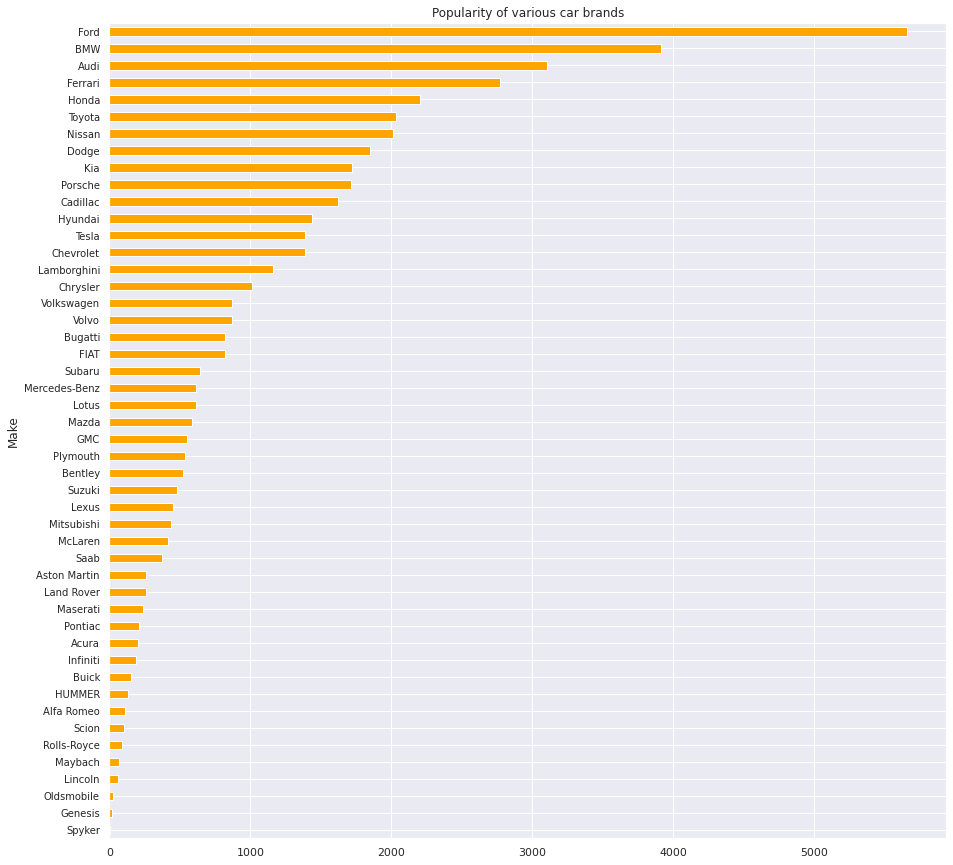

In [15]:
plt.figure(figsize=(15,15))
data.groupby('Make').mean()['Popularity'].sort_values(ascending=True).plot(kind='barh', color='orange')
plt.yticks(fontsize=10)
plt.title("Popularity of various car brands")

Text(0.5, 1.0, 'Average in City and Highway')

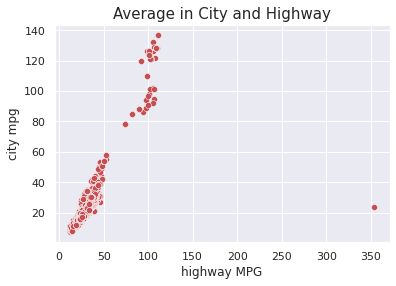

In [16]:
sn.scatterplot(x='highway MPG',y='city mpg',data=data,color='r')
plt.title("Average in City and Highway",fontsize=15)

Outlier 

In [17]:
data[data['highway MPG']>350]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600


In [18]:
data = data[data['highway MPG']<350]

Text(0.5, 1.0, 'Average in City and Highway')

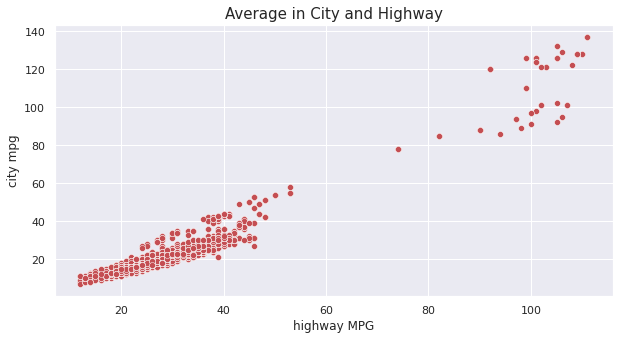

In [19]:
plt.figure(figsize=(10,5))
sn.scatterplot(x='highway MPG',y='city mpg',data=data,color='r')
plt.title("Average in City and Highway",fontsize=15)

In [20]:
data['Market Category'].unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', nan, 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
   

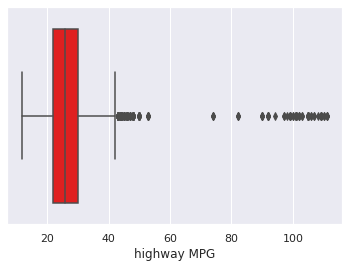

In [21]:
sn.boxplot(x = 'highway MPG', data=data, color='red')

In [22]:
for i in range(90, 100):
  print("The {:.1f}th percentile value is {:.2f}".format(i, percentile(data['highway MPG'], i)))

The 90.0th percentile value is 35.00
The 91.0th percentile value is 36.00
The 92.0th percentile value is 36.00
The 93.0th percentile value is 37.00
The 94.0th percentile value is 37.00
The 95.0th percentile value is 38.00
The 96.0th percentile value is 39.00
The 97.0th percentile value is 40.00
The 98.0th percentile value is 42.00
The 99.0th percentile value is 46.00


In [23]:
for i in [x*0.1 for x in range(990,1000)]:
  print("The {:.1f}th percentile value is {:.2f}".format(i, percentile(data['highway MPG'], i)))

The 99.0th percentile value is 46.00
The 99.1th percentile value is 46.00
The 99.2th percentile value is 48.00
The 99.3th percentile value is 48.00
The 99.4th percentile value is 50.00
The 99.5th percentile value is 85.52
The 99.6th percentile value is 97.35
The 99.7th percentile value is 101.00
The 99.8th percentile value is 103.35
The 99.9th percentile value is 107.09


In [24]:
data = data[data['highway MPG']<60]

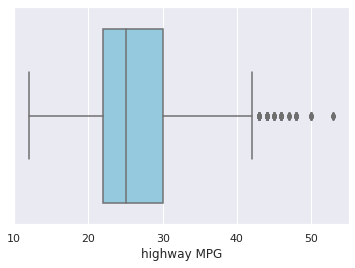

In [25]:
sn.boxplot(x='highway MPG', data=data, color='skyblue')

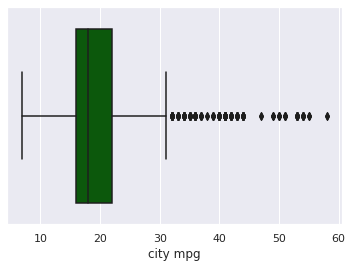

In [26]:
sn.boxplot(x='city mpg', data=data, color='darkgreen')

Text(0.5, 1.0, 'Boxplot of City and Highway MPG')

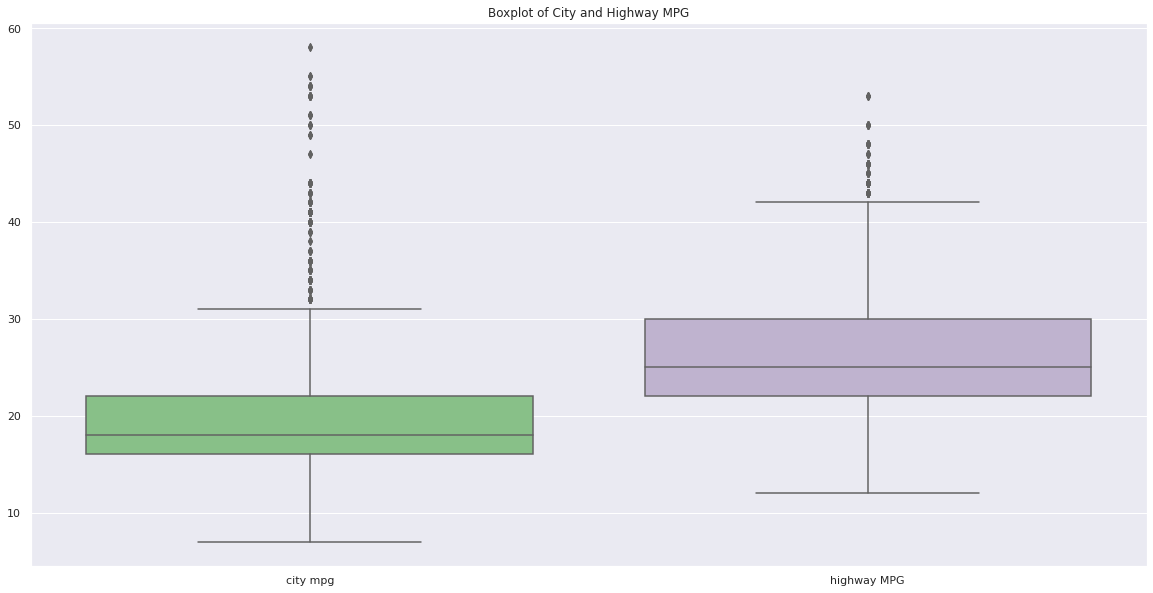

In [27]:
plt.figure(figsize=(20,10))
sn.boxplot(data=data[['city mpg','highway MPG']],palette='Accent')
plt.title("Boxplot of City and Highway MPG")

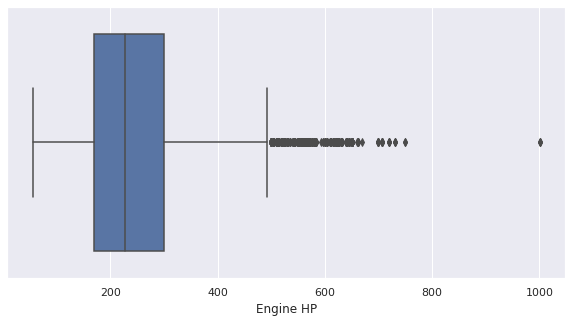

In [28]:
plt.figure(figsize=(10,5))
sn.boxplot(data['Engine HP'])

## Implot between Engine HP and Popularity

Text(0.5, 1.0, 'Implot between Engine HP and Popularity')

<Figure size 720x360 with 0 Axes>

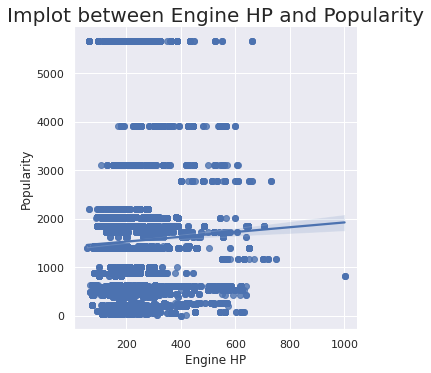

In [29]:
plt.figure(figsize=(10,5))
sn.lmplot(x='Engine HP',y='Popularity',data=data)
plt.title("Implot between Engine HP and Popularity",fontsize=20)

### Implot between Engine Cylinders and Popularity

Text(0.5, 1.0, 'Implot between Engine Cylinders and Popularity')

<Figure size 720x360 with 0 Axes>

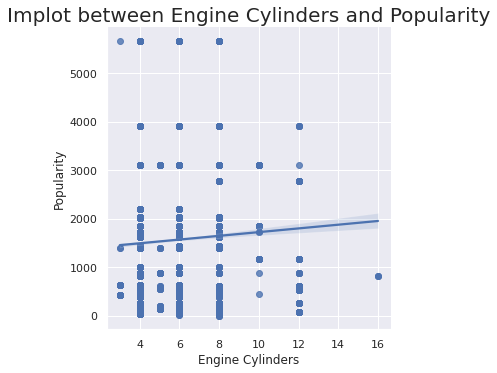

In [30]:
plt.figure(figsize=(10,5))
sn.lmplot(x='Engine Cylinders',y='Popularity',data=data)
plt.title("Implot between Engine Cylinders and Popularity",fontsize=20)

## Implot between Engine Cylinders and Engine HP

Text(0.5, 1.0, 'Engine Popularity vs Engine HP')

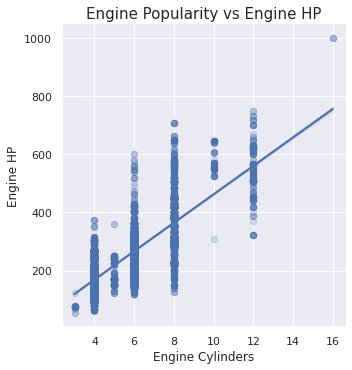

In [31]:
sn.lmplot(x='Engine Cylinders',y='Engine HP',data=data, scatter_kws={"s":40,"alpha":0.2})
plt.title("Engine Popularity vs Engine HP",fontsize=15)

## Implot between Engine HP and City MPG

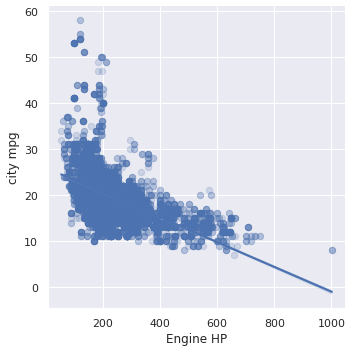

In [32]:
sn.lmplot(x='Engine HP',y='city mpg',data=data,scatter_kws={"s":40,"alpha":0.2})

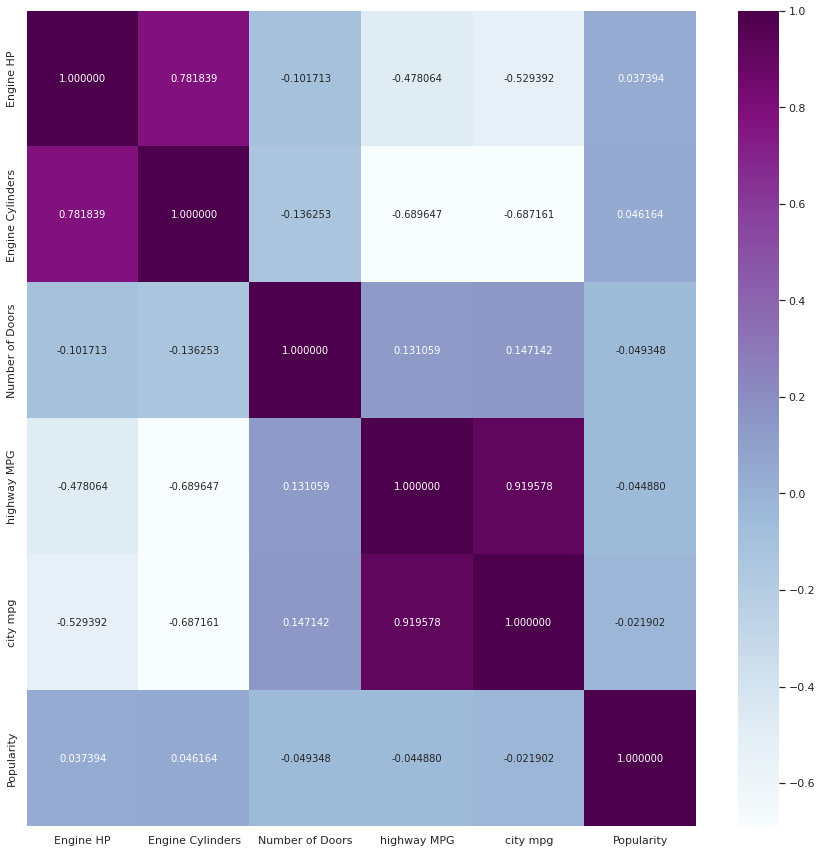

In [33]:
plt.figure(figsize=(15,15))
n_m = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']
h_m = data[n_m].corr()

sn.heatmap(h_m, cmap='BuPu', annot=True, fmt='f')

In [34]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              25
Engine Cylinders       20
Transmission Type       0
Driven_Wheels           0
Number of Doors         1
Market Category      3737
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [35]:
data['Number of Doors'].median()

4.0

In [36]:
data['Number of Doors'].fillna(4.0,inplace=True)

In [37]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              25
Engine Cylinders       20
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3737
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

## Creating a new column

In [38]:
data['Present'] = 2022

In [39]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Present
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,2022
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,2022
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,2022
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,2022
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,2022


In [40]:
data["Manufacture Date"] = data['Present'] - data['Year']

In [41]:
data.drop(['Present'],1,inplace=True)

Text(0.5, 1.0, 'Total number of cars with manufacturing data')

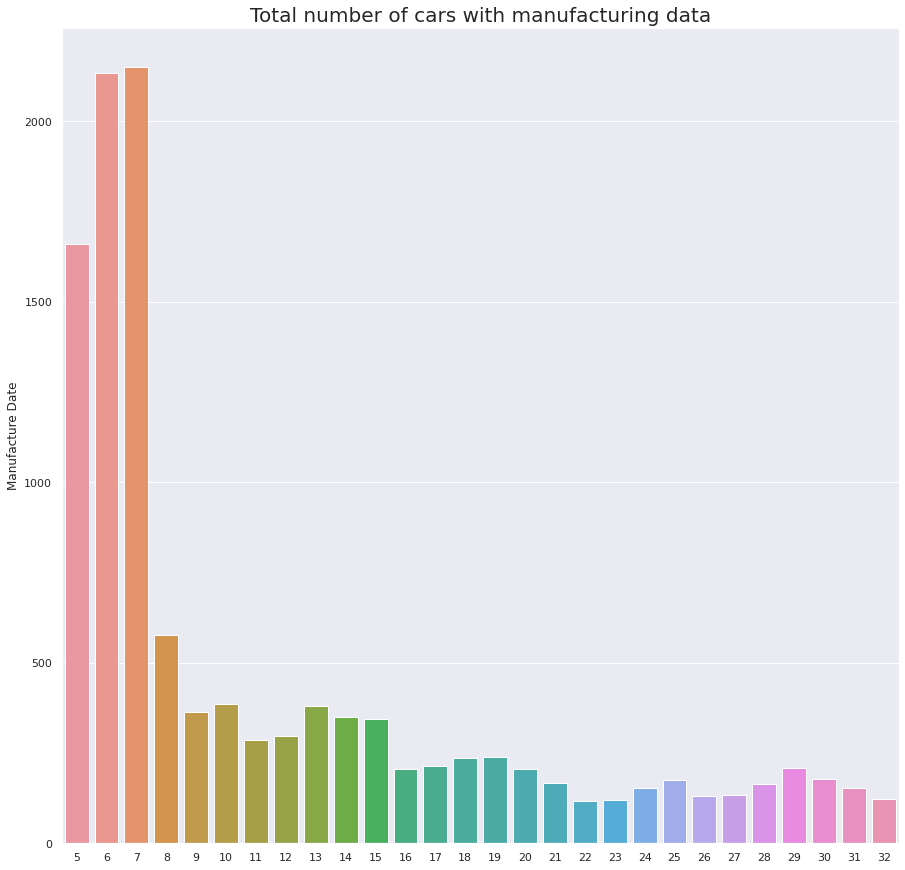

In [42]:
plt.figure(figsize=(15,15))
sn.barplot(y=data['Manufacture Date'].value_counts(),x=data['Manufacture Date'].value_counts().index)
plt.title("Total number of cars with manufacturing data", fontsize=20)

In [43]:
data['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'flex-fuel (premium unleaded recommended/E85)',
       'natural gas', 'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [44]:
data['Engine Fuel Type'].mode()

0    regular unleaded
dtype: object

In [45]:
data['Engine Fuel Type'].fillna("regular unleaded", inplace=True)

In [46]:
data['Engine Fuel Type'].isnull().sum()

0

In [47]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP              25
Engine Cylinders       20
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3737
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
Manufacture Date        0
dtype: int64

In [48]:
data['Engine HP'].fillna(data['Engine HP'].median(), inplace=True)

In [49]:
data["Engine Cylinders"].fillna(4,inplace=True)

In [50]:
data.drop(['Market Category'],1,inplace=True)

In [51]:
data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
Manufacture Date     0
dtype: int64

In [52]:
data['Vehicle Size'].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [53]:
data['Vehicle Style'].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

## Manipulation of data

In [54]:
s_data = shuffle(data, random_state=100)
X = s_data.drop(['MSRP'],1)
y = s_data["MSRP"]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

## Encoding Data

In [56]:
encoder = TargetEncoder(cols='Year')

In [57]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Manufacture Date
7272,Lexus,NX 200t,2015,premium unleaded (required),235.0,4.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,28,21,454,7
11814,Toyota,Yaris,2015,regular unleaded,106.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr Hatchback,36,30,2031,7
11021,Toyota,Tundra,2017,regular unleaded,310.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Extended Cab Pickup,19,15,2031,5
8795,GMC,S-15 Jimmy,1991,regular unleaded,150.0,6.0,MANUAL,rear wheel drive,2.0,Compact,2dr SUV,22,15,549,31
4464,Ford,F-150 Heritage,2004,regular unleaded,202.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,13,5657,18


In [58]:
encoder.fit(X_train['Year'], y_train.to_frame()['MSRP'])

TargetEncoder(cols=['Year'])

In [59]:
X_train['Year'] = encoder.transform(X_train['Year'])

In [60]:
X_test['Year'] = encoder.transform(X_test['Year'])

In [61]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Manufacture Date
7272,Lexus,NX 200t,47505.915380,premium unleaded (required),235.0,4.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,28,21,454,7
11814,Toyota,Yaris,47505.915380,regular unleaded,106.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr Hatchback,36,30,2031,7
11021,Toyota,Tundra,42732.152012,regular unleaded,310.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Extended Cab Pickup,19,15,2031,5
8795,GMC,S-15 Jimmy,2099.745763,regular unleaded,150.0,6.0,MANUAL,rear wheel drive,2.0,Compact,2dr SUV,22,15,549,31
4464,Ford,F-150 Heritage,35833.555556,regular unleaded,202.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,13,5657,18


In [62]:
encoder = TargetEncoder(cols='Model')
encoder.fit(X_train['Model'], y_train.to_frame()['MSRP'])
X_train['Model'] = encoder.transform(X_train['Model'])
X_test['Model'] = encoder.transform(X_test['Model'])

In [63]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Manufacture Date
7272,Lexus,36618.003322,47505.915380,premium unleaded (required),235.0,4.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,28,21,454,7
11814,Toyota,16495.556557,47505.915380,regular unleaded,106.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr Hatchback,36,30,2031,7
11021,Toyota,37540.227273,42732.152012,regular unleaded,310.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Extended Cab Pickup,19,15,2031,5
8795,GMC,2000.032177,2099.745763,regular unleaded,150.0,6.0,MANUAL,rear wheel drive,2.0,Compact,2dr SUV,22,15,549,31
4464,Ford,25419.329945,35833.555556,regular unleaded,202.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,13,5657,18


In [64]:
encoder = TargetEncoder(cols='Make')
encoder.fit(X_train['Make'], y_train.to_frame()['MSRP'])
X_train['Make'] = encoder.transform(X_train['Make'])
X_test['Make'] = encoder.transform(X_test['Make'])

In [65]:
X_train['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'flex-fuel (premium unleaded recommended/E85)',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', 'natural gas'], dtype=object)

## One Hot Encoding

In [66]:
encoder = OneHotEncoder()
encoder.fit(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
ohe_train = encoder.transform(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
ohe_test = encoder.transform(X_test[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])

In [67]:
X_train = pd.concat([X_train,ohe_train],1)
X_test = pd.concat([X_test,ohe_test],1)

In [68]:
X_train.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'],1,inplace=True)
X_test.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'],1,inplace=True)

In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9477 entries, 7272 to 1221
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 9477 non-null   float64
 1   Model                9477 non-null   float64
 2   Year                 9477 non-null   float64
 3   Engine HP            9477 non-null   float64
 4   Engine Cylinders     9477 non-null   float64
 5   Number of Doors      9477 non-null   float64
 6   highway MPG          9477 non-null   int64  
 7   city mpg             9477 non-null   int64  
 8   Popularity           9477 non-null   int64  
 9   Manufacture Date     9477 non-null   int64  
 10  Engine Fuel Type_1   9477 non-null   int64  
 11  Engine Fuel Type_2   9477 non-null   int64  
 12  Engine Fuel Type_3   9477 non-null   int64  
 13  Engine Fuel Type_4   9477 non-null   int64  
 14  Engine Fuel Type_5   9477 non-null   int64  
 15  Engine Fuel Type_6   9477 non-null 

In [70]:
X_train.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Manufacture Date,...,Vehicle Style_7,Vehicle Style_8,Vehicle Style_9,Vehicle Style_10,Vehicle Style_11,Vehicle Style_12,Vehicle Style_13,Vehicle Style_14,Vehicle Style_15,Vehicle Style_16
7272,47447.273292,36618.003322,47505.915380,235.0,4.0,4.0,28,21,454,7,...,0,0,0,0,0,0,0,0,0,0
11814,28808.757983,16495.556557,47505.915380,106.0,4.0,4.0,36,30,2031,7,...,0,0,0,0,0,0,0,0,0,0
11021,28808.757983,37540.227273,42732.152012,310.0,8.0,4.0,19,15,2031,5,...,0,0,0,0,0,0,0,0,0,0
8795,30032.830424,2000.032177,2099.745763,150.0,6.0,2.0,22,15,549,31,...,0,0,0,0,0,0,0,0,0,0
4464,27397.039660,25419.329945,35833.555556,202.0,6.0,2.0,18,13,5657,18,...,0,0,0,0,0,0,0,0,0,0


## Standardization and Normalisation of data

In [71]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_tn = scaler.transform(X_train)
X_ten = scaler.transform(X_test)

In [72]:
X_tn.shape

(9477, 47)

In [73]:
error_mean_square = []
m_absolute_error = []

## Linear Regression

In [74]:
model = LinearRegression()
model.fit(X_tn,y_train)

LinearRegression()

In [75]:
y_pred = model.predict(X_ten)

In [76]:
error_mean_square.append(int(mean_squared_error(y_pred,y_test)))
m_absolute_error.append(int(mean_absolute_error(y_pred,y_test)))

In [77]:
m_absolute_error

[8100]

In [79]:
y_predict = pd.DataFrame(y_pred, columns=['Predicted Output'])

In [81]:
y_predict.head()

,Predicted Output
0,19968.0
1,99840.0
2,59648.0
3,33024.0
4,38144.0


In [84]:
y_test.to_frame().head()

,MSRP
7217,19790
11905,131500
11837,55280
5975,43690
10751,36505


In [85]:
results = pd.concat([y_predict,y_test.to_frame().reset_index(drop=True)],1,ignore_index=False)

In [89]:
results.head()

,Predicted Output,MSRP
0,19968.0,19790
1,99840.0,131500
2,59648.0,55280
3,33024.0,43690
4,38144.0,36505


## Regplot for Linear Regression Output

Text(0.5, 1.0, 'Comparison of Predicted and the Actual Values')

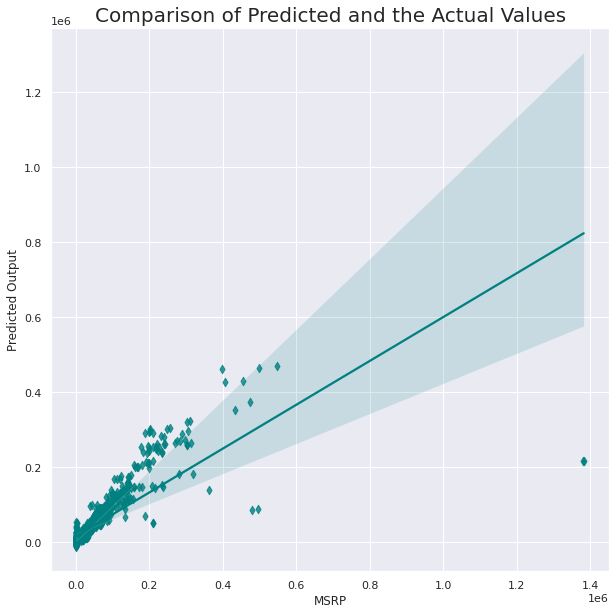

In [90]:
plt.figure(figsize=(10,10))
sn.regplot(data=results,y='Predicted Output',x = 'MSRP',color='teal',marker='d')
plt.title("Comparison of Predicted and the Actual Values", fontsize=20)